# Fusion et analyse des différents fichiers

## Détail des fichiers :

### olist_order_payments_dataset :

- `payment_sequential` => un client peut payer une commande avec plus d'un mode de paiement. S'il le fait, une séquence sera créée
- `payment_installments` => nombre de versements choisit par le client. 
- `payment_value` => valeur de la transaction
- `payment_type` => type de paiement choisit par le client à la séquence N
- `order_id` => référence de la commande


### olist_order_reviews_dataset :

- `order_id` => référence de la commande
- `review_id` => référence de la note attribuée au client
- `review_score` => score de 1 à 5 attribué sur la commande
- `review_comment_title` => titre du commentaire laissé par le client
- `review_comment_message` => contenu du commentaire laissé par le client
- `review_creation_date` => date d'envoi du formulaire ( format YYYY-MM-DD)
- `review_answer_timestamp` => date de réponse au formulaire (format YYYY-MM-DD hh:mm:ss)


### olist_orders_dataset :

- `order_id` => référence de la commande
- `customer_id` => référence de l'utilisateur pour la commande
- `order_status` => statut de la commande
- `order_purchase_timestamp` => date d'achat de la commande
- `order_approved_at` => date d'acceptation du moyen de paiement
- `order_delivered_carrier_date` => date traitement par la logistique
- `order_delivered_customer_date` => date réelle de livraison
- `order_estimated_delivery_date` => date estimée de la livraison

### olist_products_dataset :

- `product_id` => référence du produit
- `product_category_name` => catégorie du produit
- `product_name_lenght` => nombre de caractère du nom de produit
- `product_description_lenght` => description du produit
- `product_photos_qty` => nombre de photo publiée du produit
- `product_weight_g` => poids du produit mesuré en gramme
- `product_length_cm` => longueur du produit mesuré en centimètre 
- `product_height_cm` => hauteur du produit mesuré en centimètre 
- `product_width_cm` => largeur du produit mesuré en centimètre 


### olist_order_items_dataset :

- `order_id` => référence de la commande
- `order_item_id` => référence du produit dans la commande
- `product_id` => référence du produit
- `seller_id` => référence du vendeur
- `shipping_limit_date` => date limite d'expédition du vendeur pour le transfert de la commande à la logistique
- `price` => prix du produit
- `freight_value` => prix du transport ( si une commande comporte plus d'un article, la valeur du transport est répartit entre les articles )

### olist_sellers_dataset :

- `seller_id` => référence vendeur
- `seller_zip_code_prefix` => 5 premiers chiffres du code postal du vendeur
- `seller_city` => ville du vendeur
- `seller_state` => pays du vendeur

### olist_order_customer_dataset :

- `customer_id` => référence client pour une commande
- `customer_unique_id` => référence unique d'un client
- `customer_zip_code_prefix` => code postal du client
- `customer_city` => ville du client
- `customer_state` => pays du client

### olist_geolocation_dataset :

- `geolocation_zip_code_prefix` => code postal (5 premiers chiffres)
- `geolocation_lat` => latitude associé
- `geolocation_lng` => longitude
- `geolocation_city` => ville
- `geolocation_state` => pays

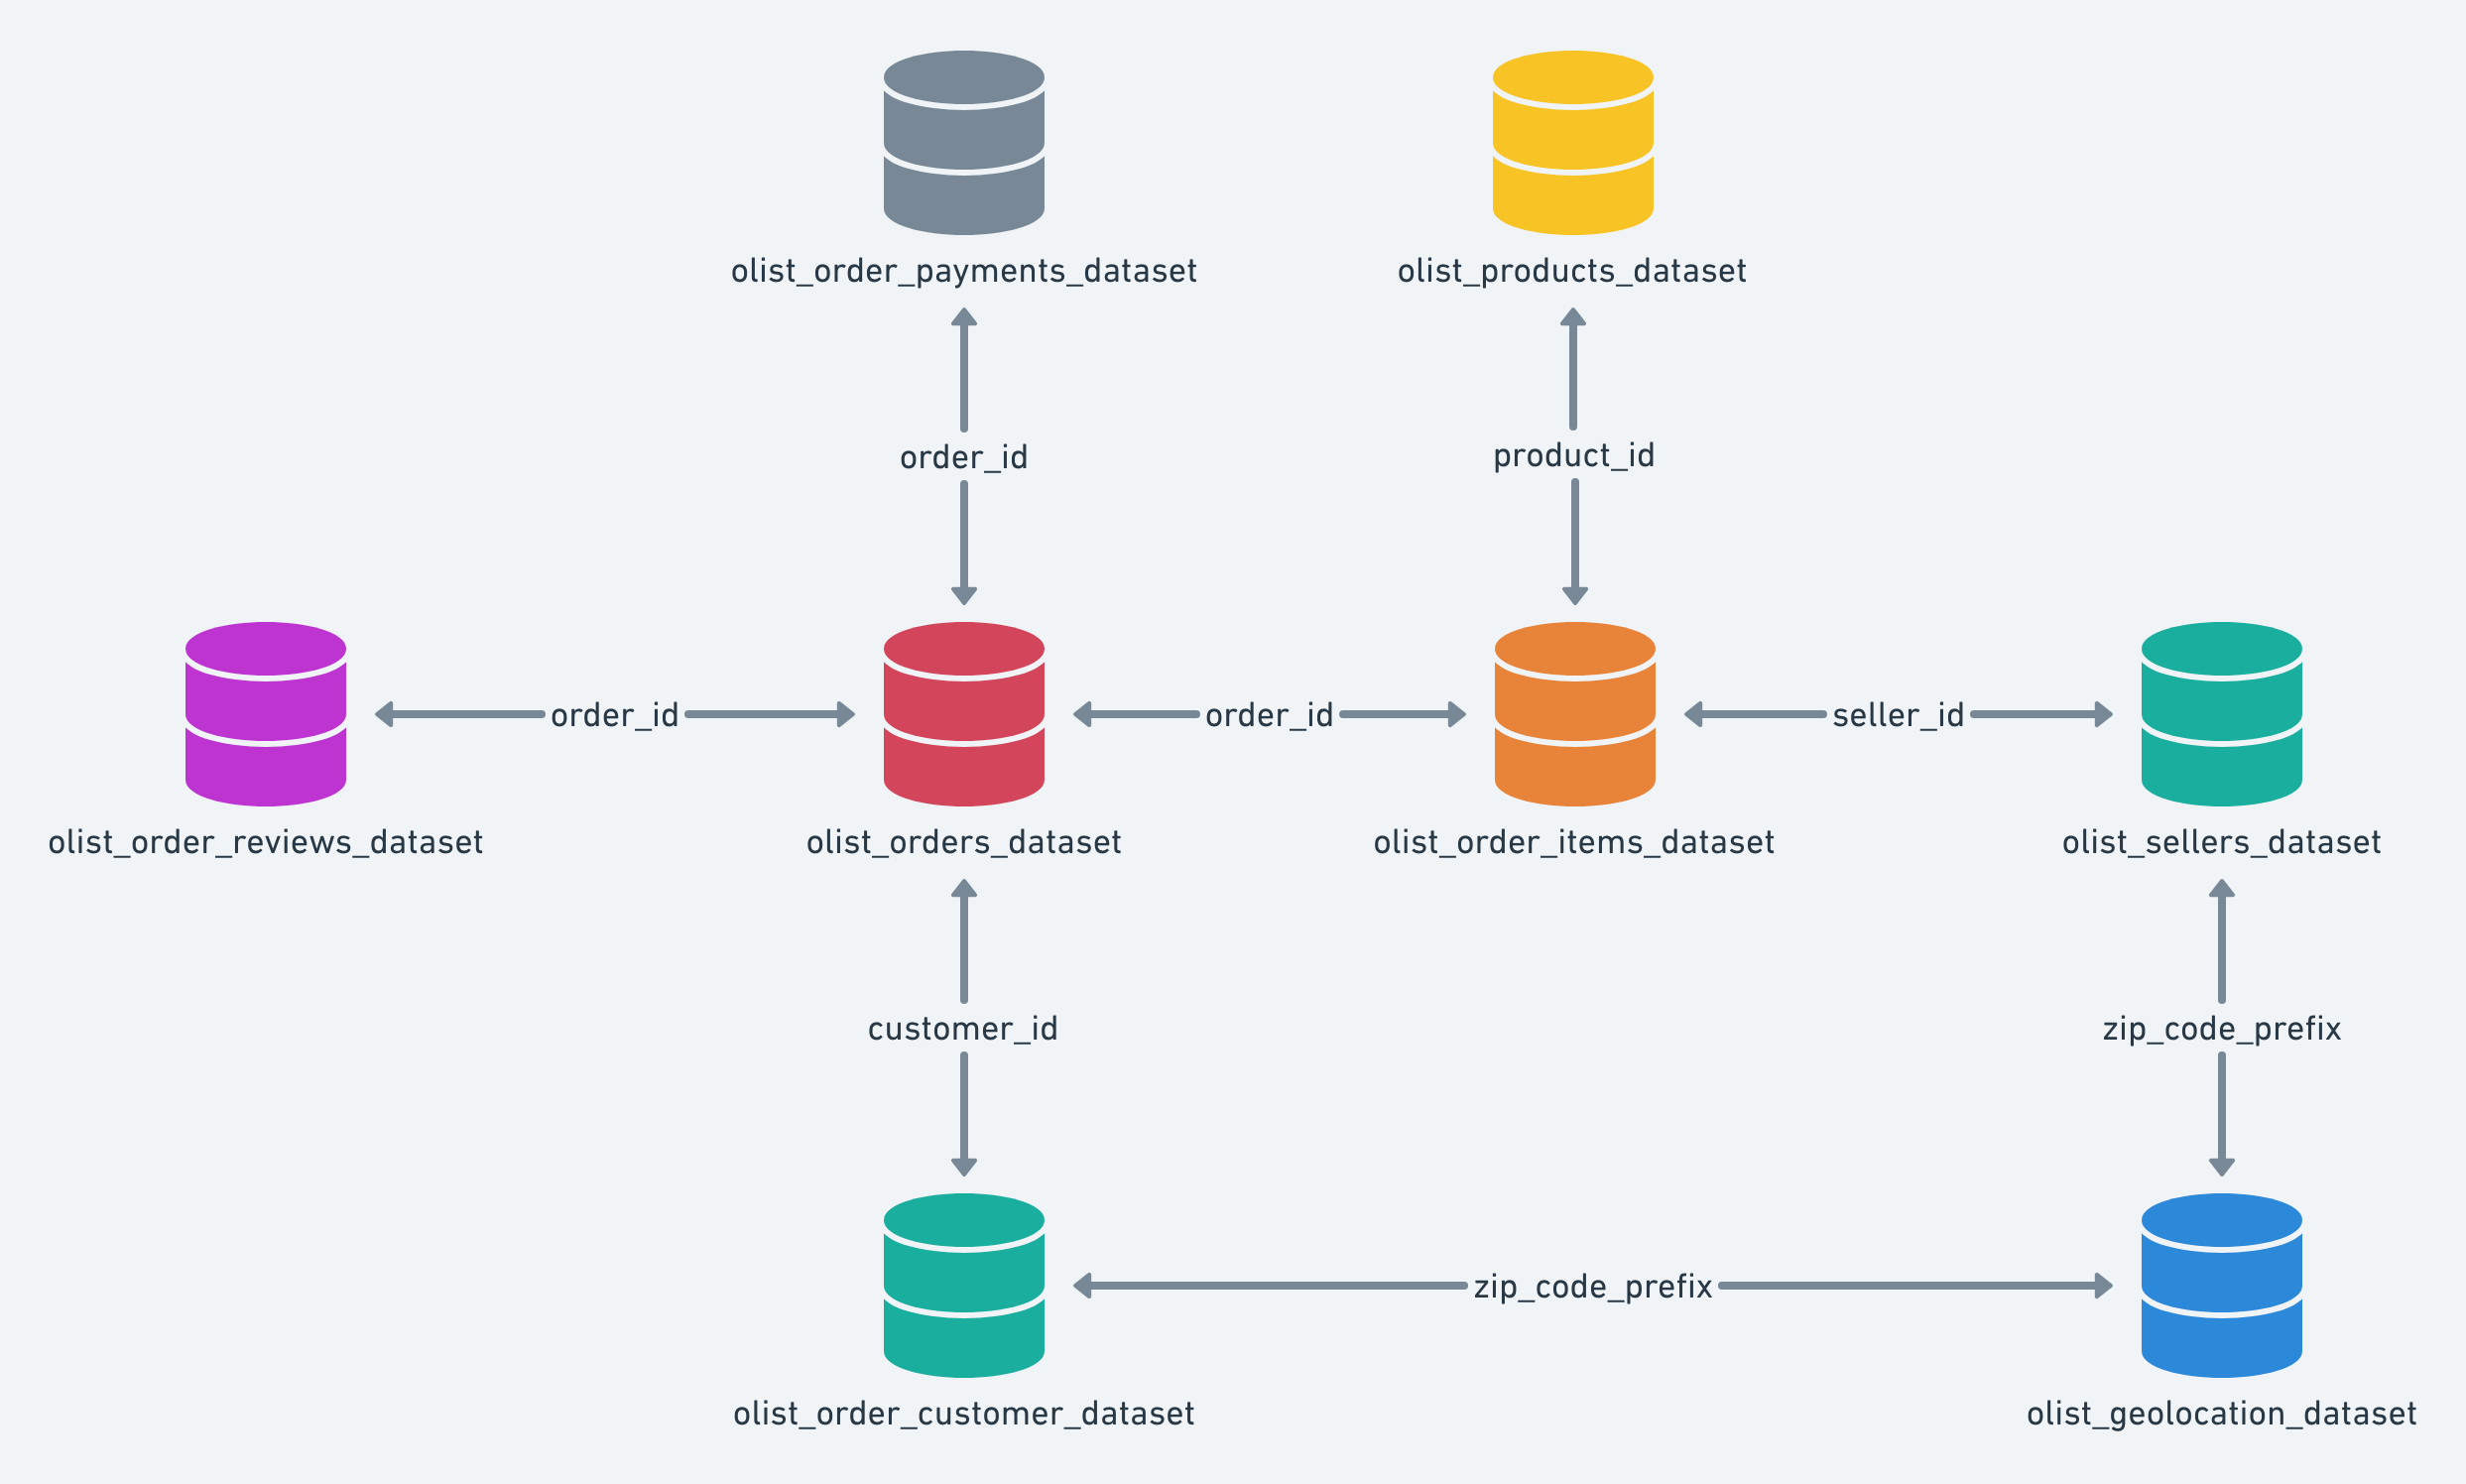

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import warnings
pd.set_option("display.max_rows",100)  
pd.set_option("display.max_columns",None)
warnings.filterwarnings('ignore')

## Première Analyse exploratoire

In [2]:
import os
dir_data = "./data/"
dir_final_dataset = "./final_dataset/"
for file in os.listdir(dir_data):
    print(file, " :")
    print("      shape :",pd.read_csv(dir_data + file).shape)
    print("")

olist_customers_dataset.csv  :
      shape : (99441, 5)

olist_geolocation_dataset.csv  :
      shape : (1000163, 5)

olist_orders_dataset.csv  :
      shape : (99441, 8)

olist_order_items_dataset.csv  :
      shape : (112650, 7)

olist_order_payments_dataset.csv  :
      shape : (103886, 5)

olist_order_reviews_dataset.csv  :
      shape : (100000, 7)

olist_products_dataset.csv  :
      shape : (32951, 9)

olist_sellers_dataset.csv  :
      shape : (3095, 4)

product_category_name_translation.csv  :
      shape : (71, 2)



In [3]:
dict_df = {}

### Customer

In [4]:
customer_df = pd.read_csv(dir_data + "olist_customers_dataset.csv")
dict_df["olist_customers_dataset"] = customer_df
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Geolocation

In [5]:
geolocation_df = pd.read_csv(dir_data + "olist_geolocation_dataset.csv")
dict_df["olist_geolocation_dataset"] = geolocation_df
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Order

In [6]:
order_df = pd.read_csv(dir_data + "olist_orders_dataset.csv")
dict_df["olist_orders_dataset"] = order_df
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
order_items_df = pd.read_csv(dir_data + "olist_order_items_dataset.csv")
dict_df["olist_order_items_dataset"] = order_items_df
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_payments_df = pd.read_csv(dir_data + "olist_order_payments_dataset.csv")
dict_df["olist_order_payments_dataset"] = order_payments_df
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
order_reviews_df = pd.read_csv(dir_data + "olist_order_reviews_dataset.csv")
dict_df["olist_order_reviews_dataset"] = order_reviews_df
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Product

In [10]:
product_df = pd.read_csv(dir_data + "olist_products_dataset.csv")
dict_df["olist_products_dataset"] = product_df
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Sellers

In [11]:
seller_df = pd.read_csv(dir_data + "olist_sellers_dataset.csv")
dict_df["olist_sellers_dataset"] = seller_df
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Translate (other)

In [12]:
product_cat_translate_df = pd.read_csv(dir_data + "product_category_name_translation.csv")
dict_df["product_category_name_translation"] = product_cat_translate_df
product_cat_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Importation des fonctions

In [2]:
import function_global as funct_g

# Analyse exploratoire des différents jeu de données

olist_customers_dataset
object    4
int64     1
dtype: int64


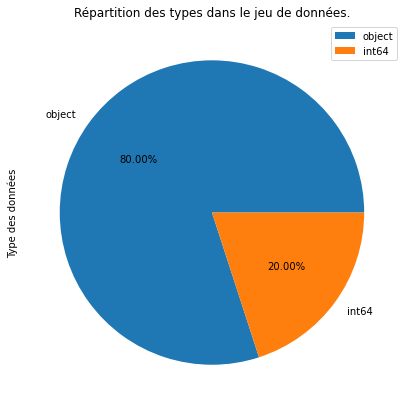

olist_geolocation_dataset
float64    2
object     2
int64      1
dtype: int64


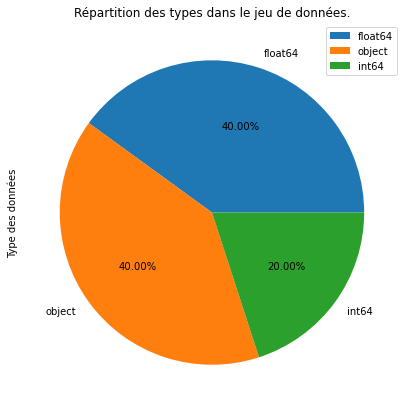

olist_orders_dataset
object    8
dtype: int64


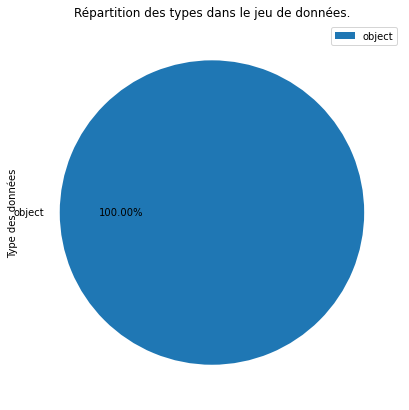

olist_order_items_dataset
object     4
float64    2
int64      1
dtype: int64


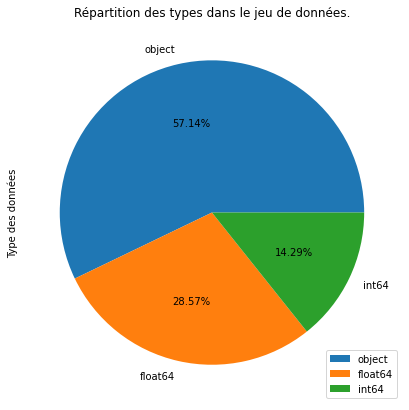

olist_order_payments_dataset
object     2
int64      2
float64    1
dtype: int64


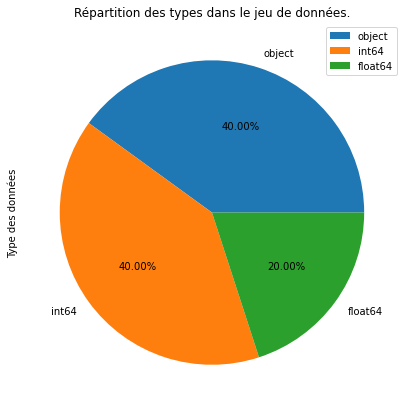

olist_order_reviews_dataset
object    6
int64     1
dtype: int64


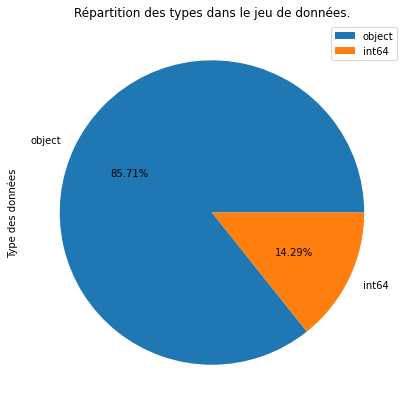

olist_products_dataset
float64    7
object     2
dtype: int64


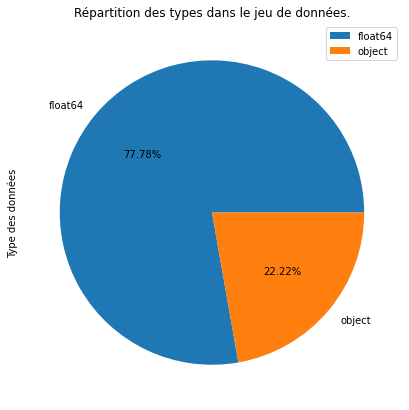

olist_sellers_dataset
object    3
int64     1
dtype: int64


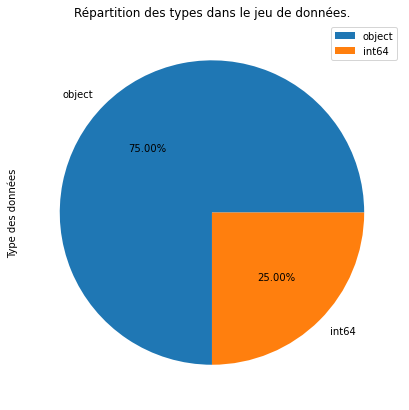

product_category_name_translation
object    2
dtype: int64


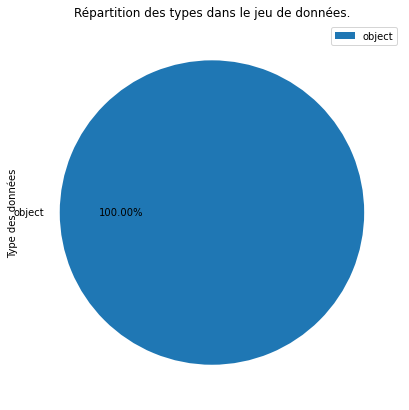

In [14]:
for k,v in dict_df.items():
    print(k)
    funct_g.plot_dtypes(v,figsize=(9,7))

In [15]:
for k,v in dict_df.items():
    print(k)
    funct_g.missing_value(v,printing=True)
    print("\n")

olist_customers_dataset
Aucune valeur manquante.


olist_geolocation_dataset
Aucune valeur manquante.


olist_orders_dataset
Il y a 3 colonnes avec des valeurs manquantes qui sont :
                               Nombre de valeurs vides  \
order_delivered_customer_date                     2965   
order_delivered_carrier_date                      1783   
order_approved_at                                  160   

                               Pourcentage sur le total  
order_delivered_customer_date                    2.9817  
order_delivered_carrier_date                     1.7930  
order_approved_at                                0.1609  


olist_order_items_dataset
Aucune valeur manquante.


olist_order_payments_dataset
Aucune valeur manquante.


olist_order_reviews_dataset
Il y a 2 colonnes avec des valeurs manquantes qui sont :
                        Nombre de valeurs vides  Pourcentage sur le total
review_comment_title                      88285                    88.285
review_co

olist_customers_dataset


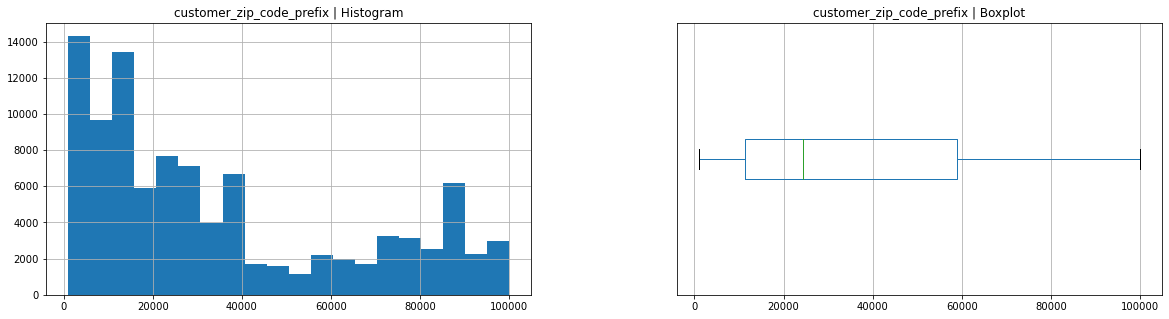


--------------------------------------------------
----------------------- next ---------------------
--------------------------------------------------
olist_geolocation_dataset


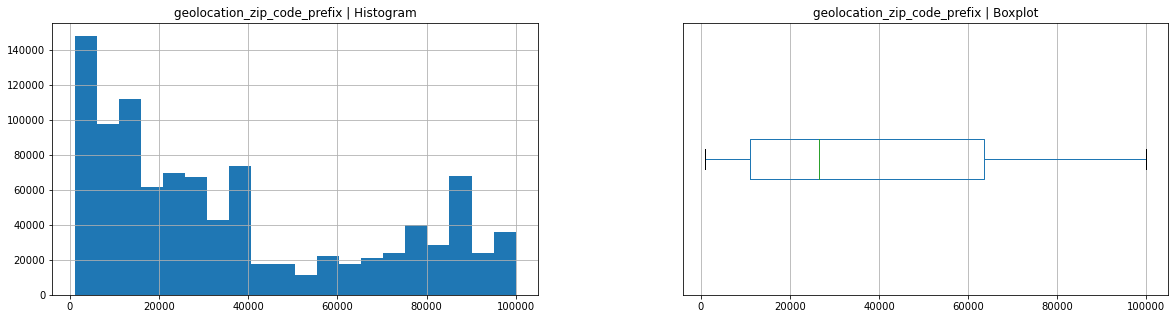

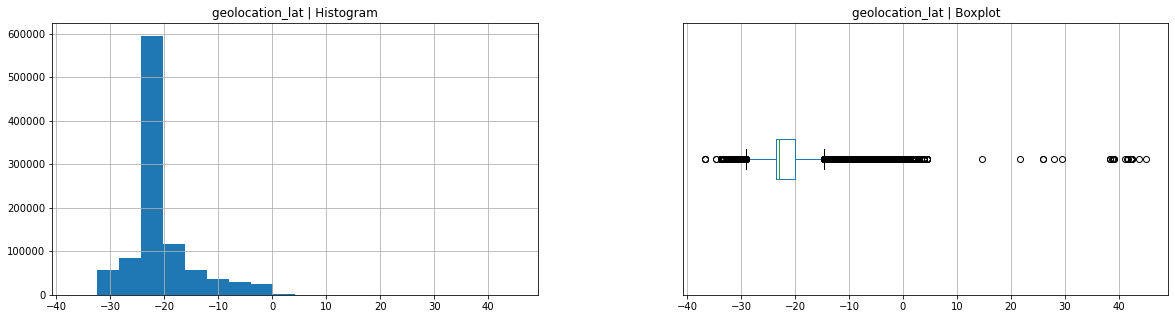

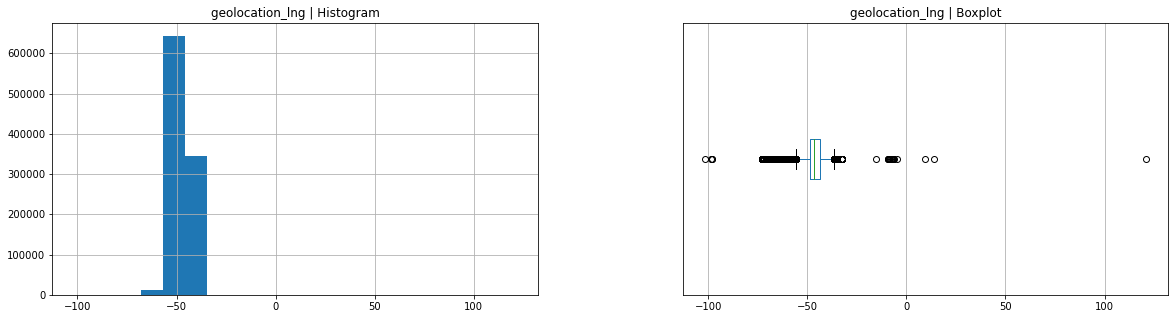


--------------------------------------------------
----------------------- next ---------------------
--------------------------------------------------
olist_orders_dataset

--------------------------------------------------
----------------------- next ---------------------
--------------------------------------------------
olist_order_items_dataset


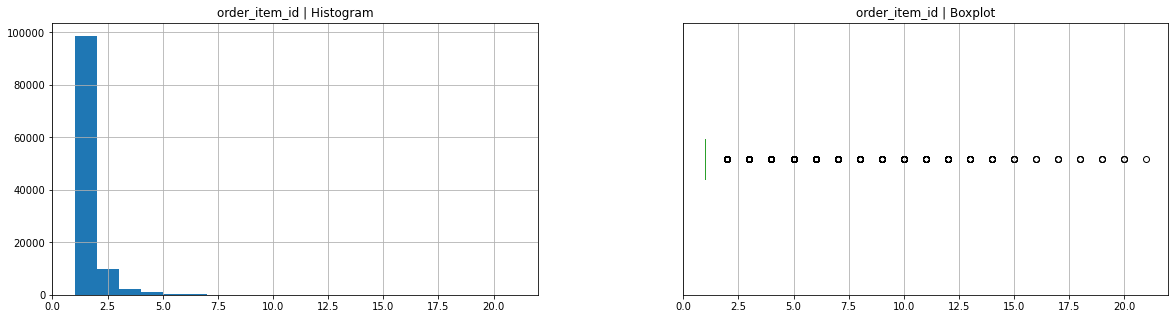

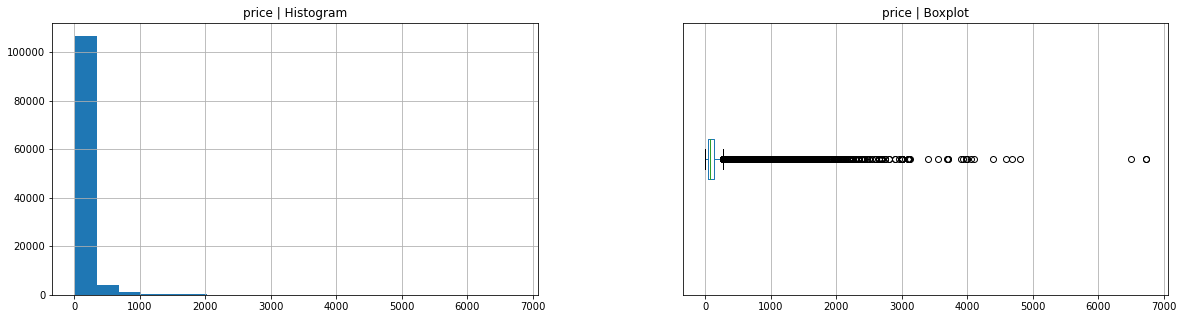

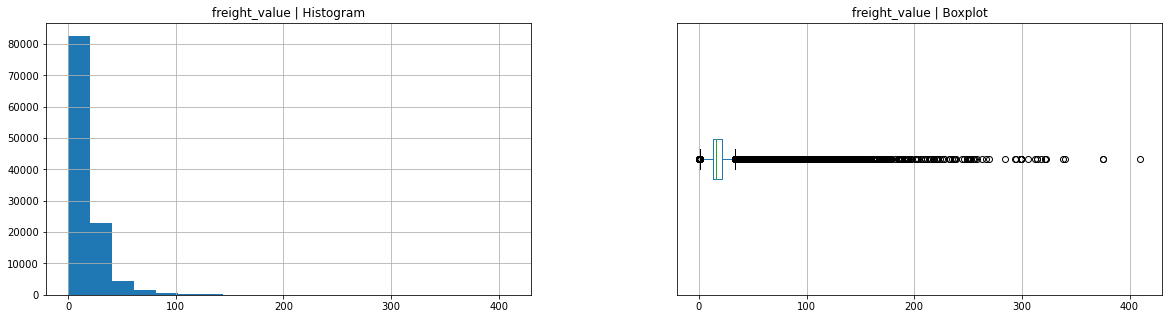


--------------------------------------------------
----------------------- next ---------------------
--------------------------------------------------
olist_order_payments_dataset


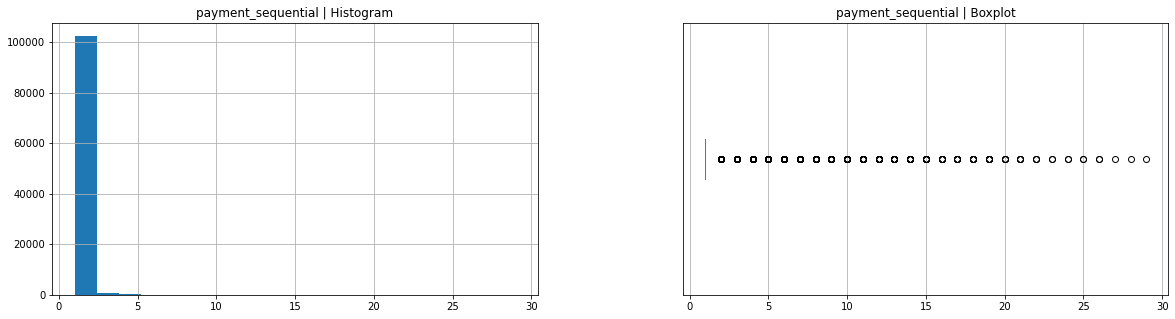

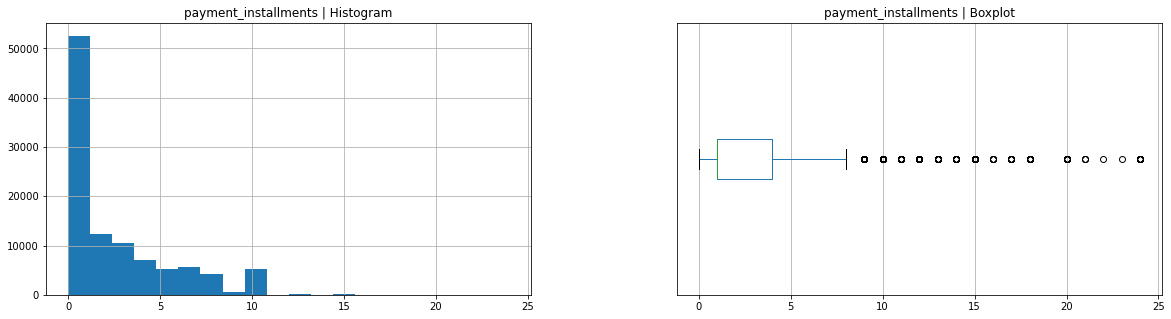

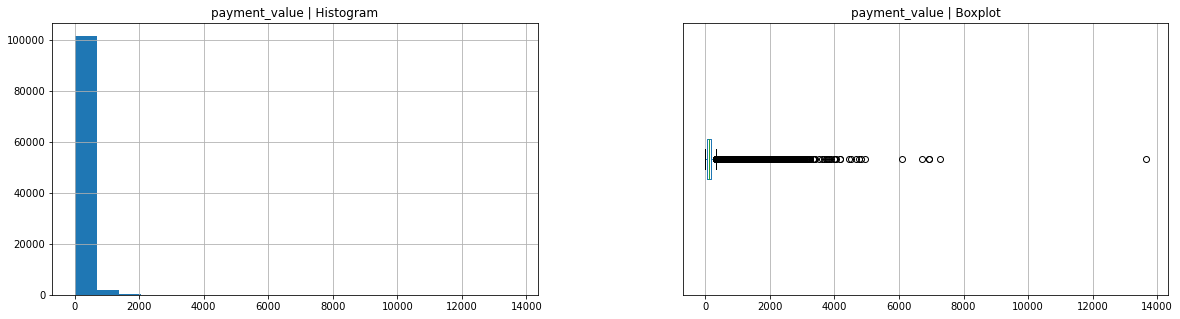


--------------------------------------------------
----------------------- next ---------------------
--------------------------------------------------
olist_order_reviews_dataset


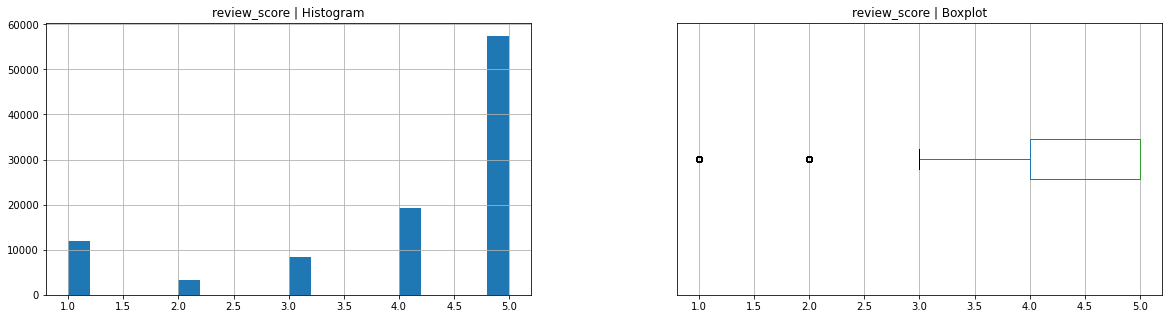


--------------------------------------------------
----------------------- next ---------------------
--------------------------------------------------
olist_products_dataset


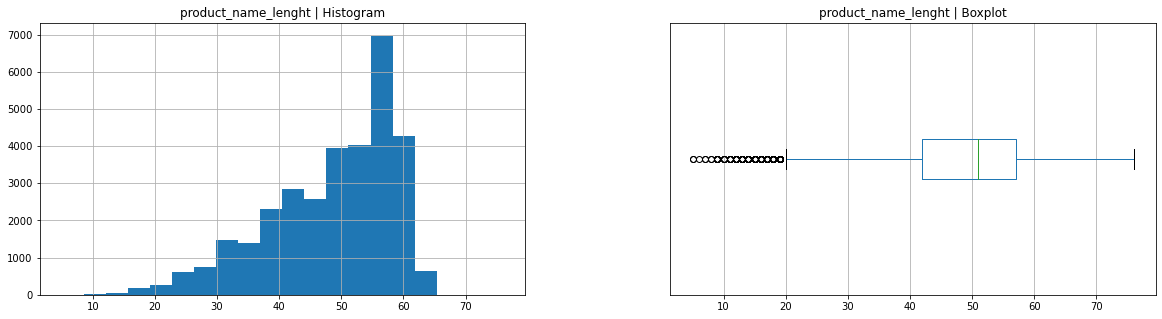

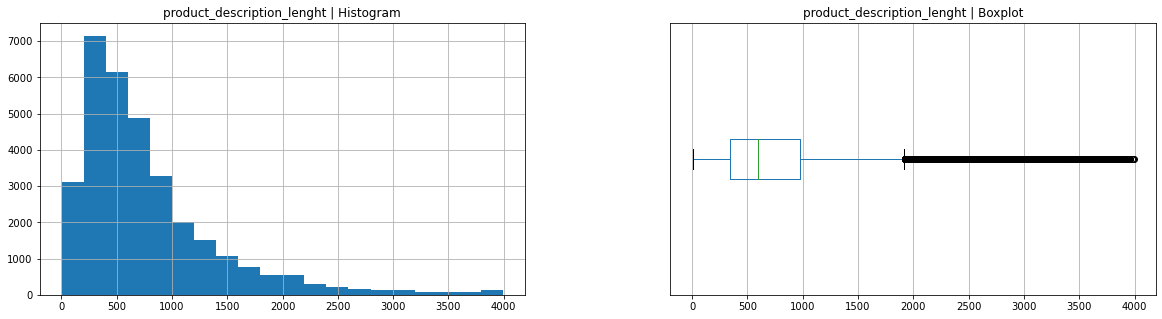

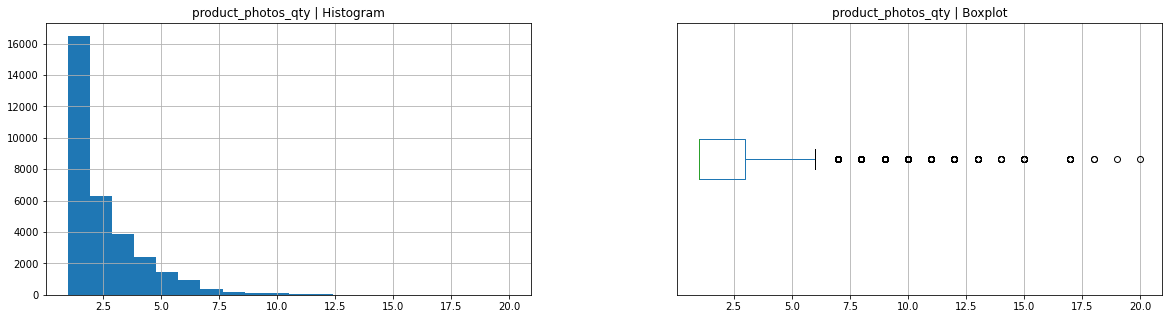

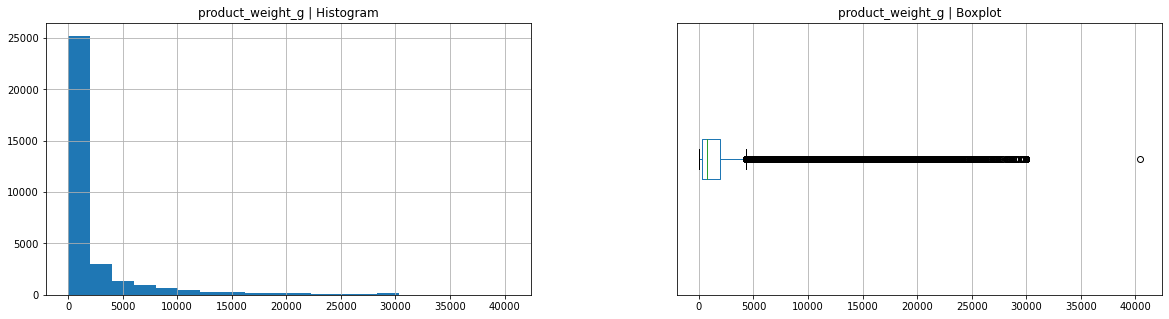

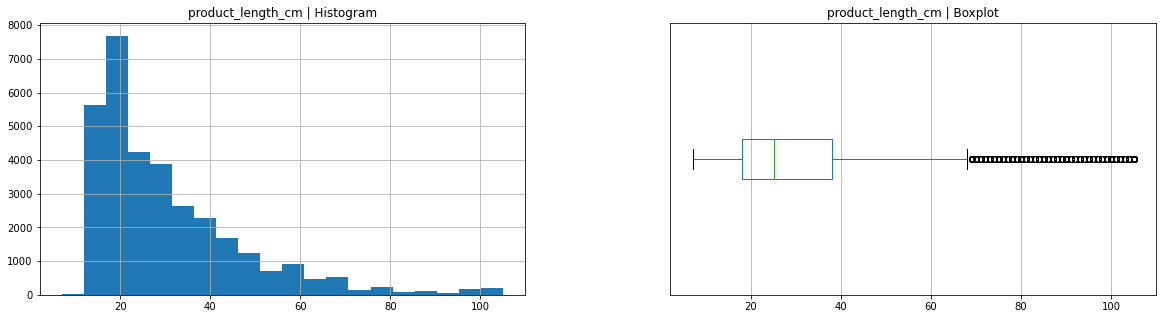

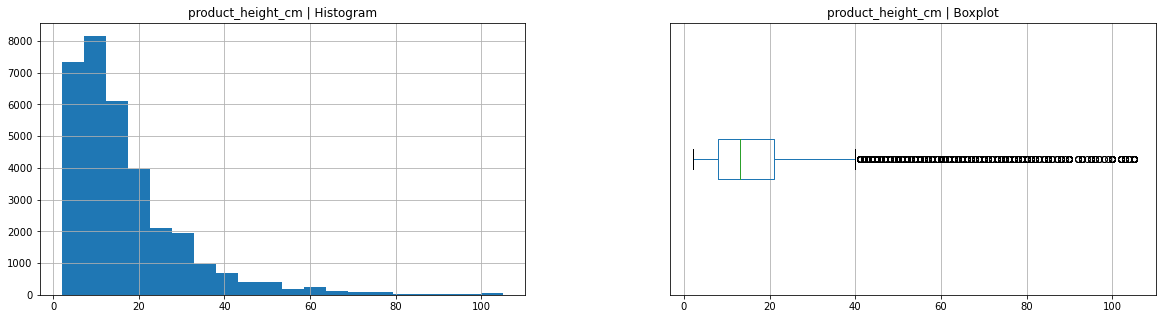

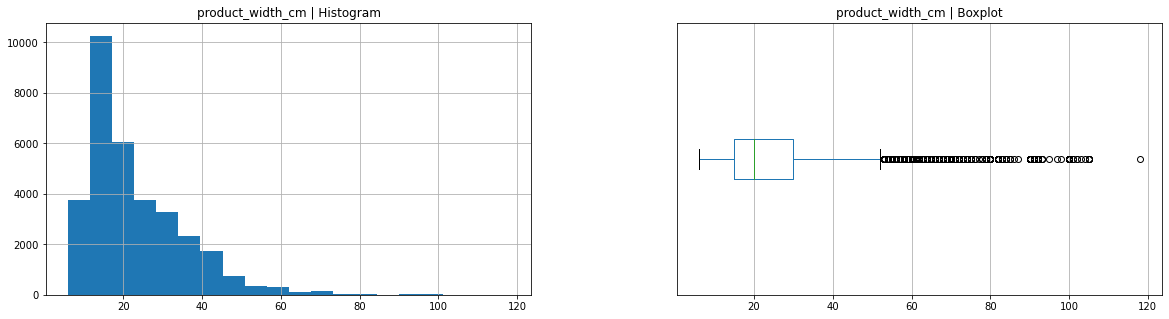


--------------------------------------------------
----------------------- next ---------------------
--------------------------------------------------
olist_sellers_dataset


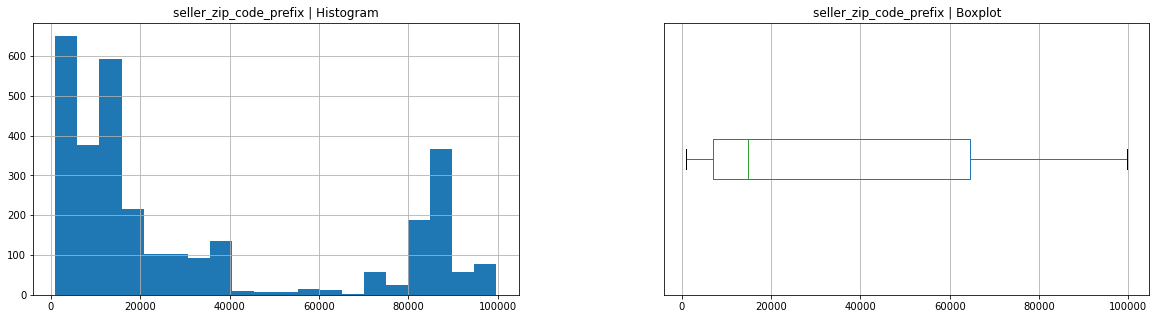


--------------------------------------------------
----------------------- next ---------------------
--------------------------------------------------
product_category_name_translation

--------------------------------------------------
----------------------- next ---------------------
--------------------------------------------------


In [16]:
for k,v in dict_df.items():
    print(k)
    funct_g.analyse_num(v)
    print("\n--------------------------------------------------\n\
----------------------- next ---------------------\n\
--------------------------------------------------")

### Fichier liaison

1) olist_order_customer_dataset
- left 
    - olist_geolocation_dataset (zip_code_prefix)
    
2) olist_sellers_dataset
- left :
    - olist_geolocation_dataset (zip_code_prefix)
    
3) olist_order_items_dataset
- left :
    - olist_products_dataset (product_id)
    - olist_sellers_dataset (seller_id)
    
4) olist_orders_dataset
- left :
    - olist_order_reviews_dataset (order_id)
    - olist_order_payments_dataset (order_id)
    - olist_order_items_dataset (order_id)
    - olist_order_customer_dataset (customer_id)

In [17]:
geolocation_df[geolocation_df.duplicated(keep=False)].sort_values(by="geolocation_zip_code_prefix")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1004,1001,-23.549292,-46.633559,sao paulo,SP
771,1001,-23.550498,-46.634338,sao paulo,SP
1435,1001,-23.549292,-46.633559,sao paulo,SP
912,1001,-23.550498,-46.634338,sao paulo,SP
985,1001,-23.550498,-46.634338,sao paulo,SP
...,...,...,...,...,...
999835,99980,-28.387432,-51.847727,david canabarro,RS
1000133,99980,-28.386689,-51.847091,david canabarro,RS
999958,99980,-28.387059,-51.848964,david canabarro,RS
1000002,99980,-28.388342,-51.845194,david canabarro,RS


In [18]:
geolocation_df[geolocation_df["geolocation_zip_code_prefix"]==1001].describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,26.0,26.000000,26.000000
mean,1001.0,-23.550190,-46.634024
std,0.0,0.000698,0.000303
min,1001.0,-23.551427,-46.634410
25%,1001.0,-23.550498,-46.634338
50%,1001.0,-23.550381,-46.634027
75%,1001.0,-23.549719,-46.633921
max,1001.0,-23.549292,-46.633559


In [19]:
all_lat_1001 = geolocation_df[geolocation_df["geolocation_zip_code_prefix"]==1001]["geolocation_lat"]
print("latitude :" , all_lat_1001.max() - all_lat_1001.min())
all_lng_1001 = geolocation_df[geolocation_df["geolocation_zip_code_prefix"]==1001]["geolocation_lng"]
print("longitude :" , all_lng_1001.max() - all_lng_1001.min())

latitude : 0.002134655288813292
longitude : 0.0008503120887368709


La dispersion reste très proche dans une même région (zip_code_prefix) on peut donc, pour faciliter le traitement, prendre la moyenne des valeurs quand il y a des doublons pour concaténer les fichiers.

In [20]:
funct_g.presentation_df(geolocation_df)

Dimensionnalitées : (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [21]:
group_zip = geolocation_df.groupby("geolocation_zip_code_prefix")
all_geo = pd.merge(left=group_zip.mean(),right=group_zip[["geolocation_city","geolocation_state"]].last(),
                   on="geolocation_zip_code_prefix",
                   how="inner").reset_index()
all_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550190,-46.634024,sao paulo,SP
1,1002,-23.548146,-46.634979,sao paulo,SP
2,1003,-23.548994,-46.635731,sao paulo,SP
3,1004,-23.549799,-46.634757,sao paulo,SP
4,1005,-23.549456,-46.636733,sao paulo,SP


In [22]:
all_geo[all_geo.duplicated(keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [23]:
del group_zip, all_lat_1001, all_lng_1001, geolocation_df

In [24]:
funct_g.presentation_df(customer_df)

Dimensionnalitées : (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [25]:
customer_geo_df = pd.merge(left=customer_df,right=all_geo,
                           left_on="customer_zip_code_prefix",right_on="geolocation_zip_code_prefix",
                           how="left")
funct_g.presentation_df(customer_geo_df)

Dimensionnalitées : (99441, 10)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.498489,-47.396929,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790.0,-23.727992,-46.542848,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151.0,-23.531642,-46.656289,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775.0,-23.499702,-46.185233,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056.0,-22.975100,-47.142925,campinas,SP


On supprime les colonnes identique avec des noms différent

In [26]:
customer_geo_df.drop(["customer_zip_code_prefix","customer_state","customer_city"],axis=1,inplace=True)
customer_geo_df.head()

,customer_id,customer_unique_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,-20.498489,-47.396929,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,-23.727992,-46.542848,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,-23.531642,-46.656289,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,-23.499702,-46.185233,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,-22.975100,-47.142925,campinas,SP


In [27]:
del customer_df

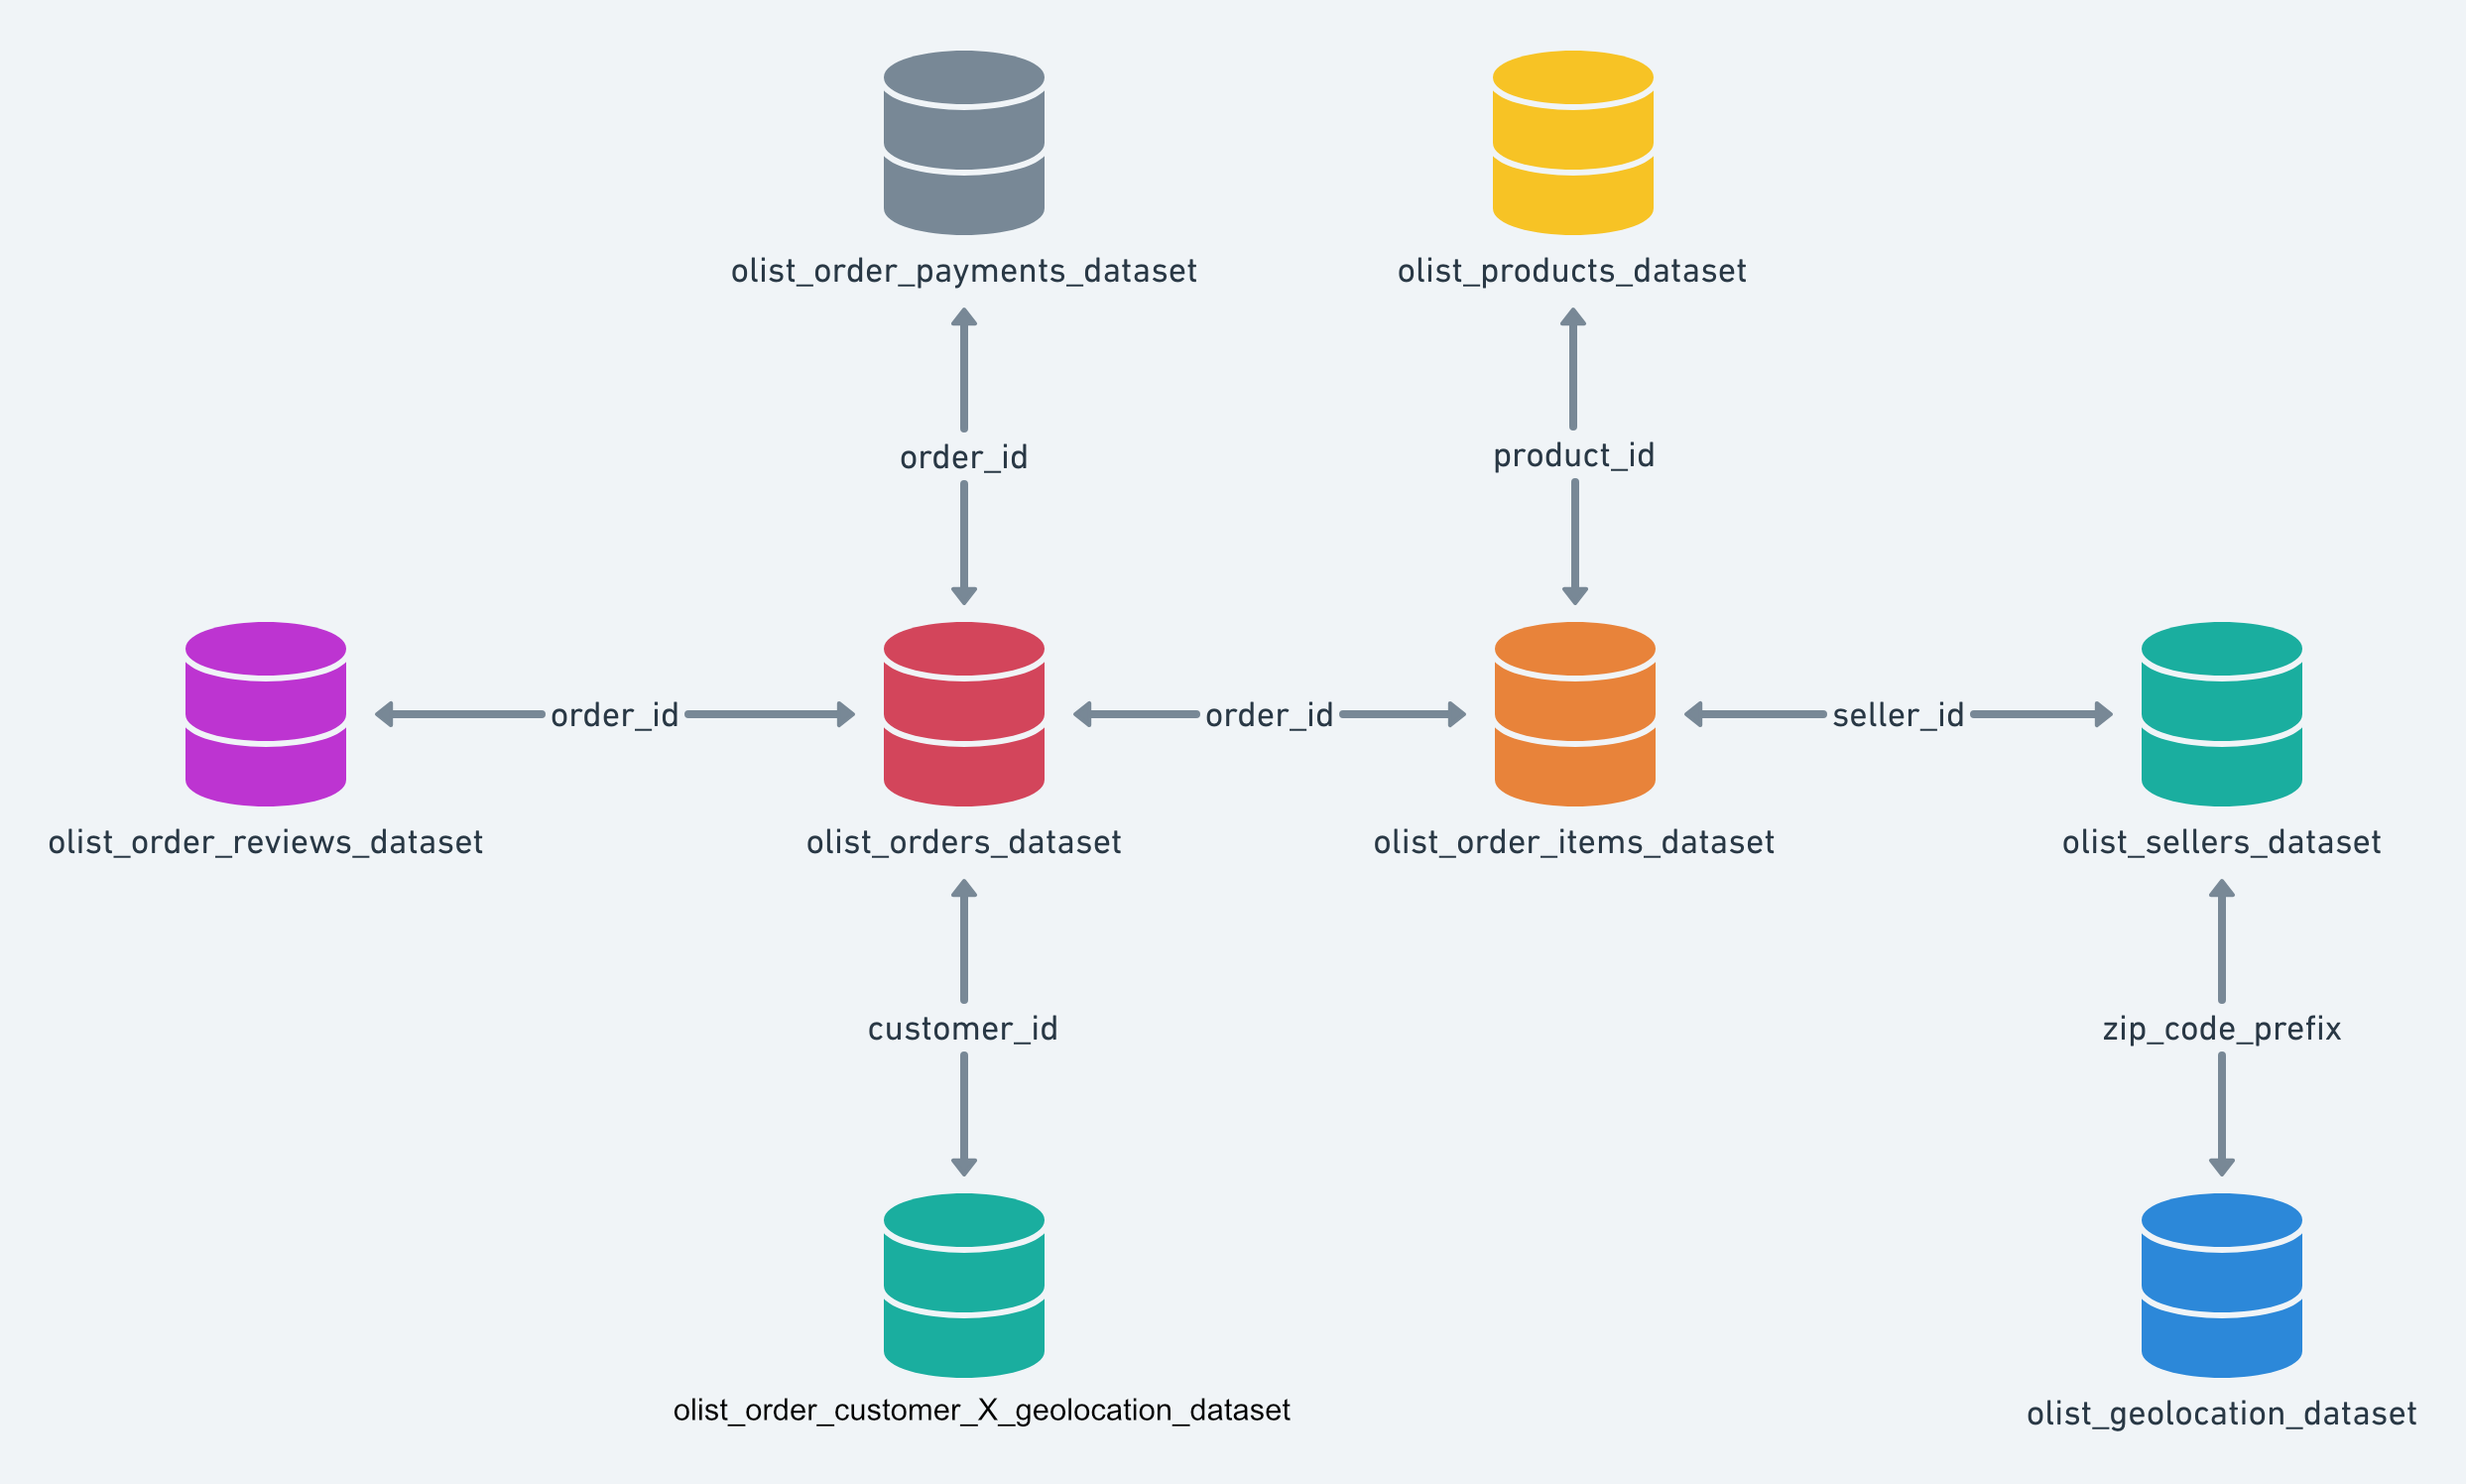

# Fichier liaison (suite)

1) olist_sellers_dataset
- left :
    - olist_geolocation_dataset (zip_code_prefix)
    
2) olist_order_items_dataset
- left :
    - olist_products_dataset (product_id)
    - olist_sellers_dataset (seller_id)
    
3) olist_orders_dataset
- left :
    - olist_order_reviews_dataset (order_id)
    - olist_order_payments_dataset (order_id)
    - olist_order_items_dataset (order_id)
    - olist_order_customer_dataset (customer_id)

In [28]:
funct_g.presentation_df(seller_df)

Dimensionnalitées : (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [29]:
seller_geo_df = pd.merge(left=seller_df,right=all_geo,
                           left_on="seller_zip_code_prefix",
                           right_on="geolocation_zip_code_prefix",how="left")
funct_g.presentation_df(seller_geo_df)

Dimensionnalitées : (3095, 9)


,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.893848,-47.061337,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,13844.0,-22.383437,-46.947927,mogi-guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,20031.0,-22.909572,-43.177703,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,4195.0,-23.657242,-46.612831,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,12914.0,-22.964803,-46.534419,braganca paulista,SP


In [30]:
seller_geo_df.drop(["seller_zip_code_prefix","seller_state","seller_city"],axis=1,inplace=True)
seller_geo_df.head()

,seller_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023.0,-22.893848,-47.061337,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844.0,-22.383437,-46.947927,mogi-guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031.0,-22.909572,-43.177703,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195.0,-23.657242,-46.612831,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914.0,-22.964803,-46.534419,braganca paulista,SP


In [31]:
del seller_df,all_geo

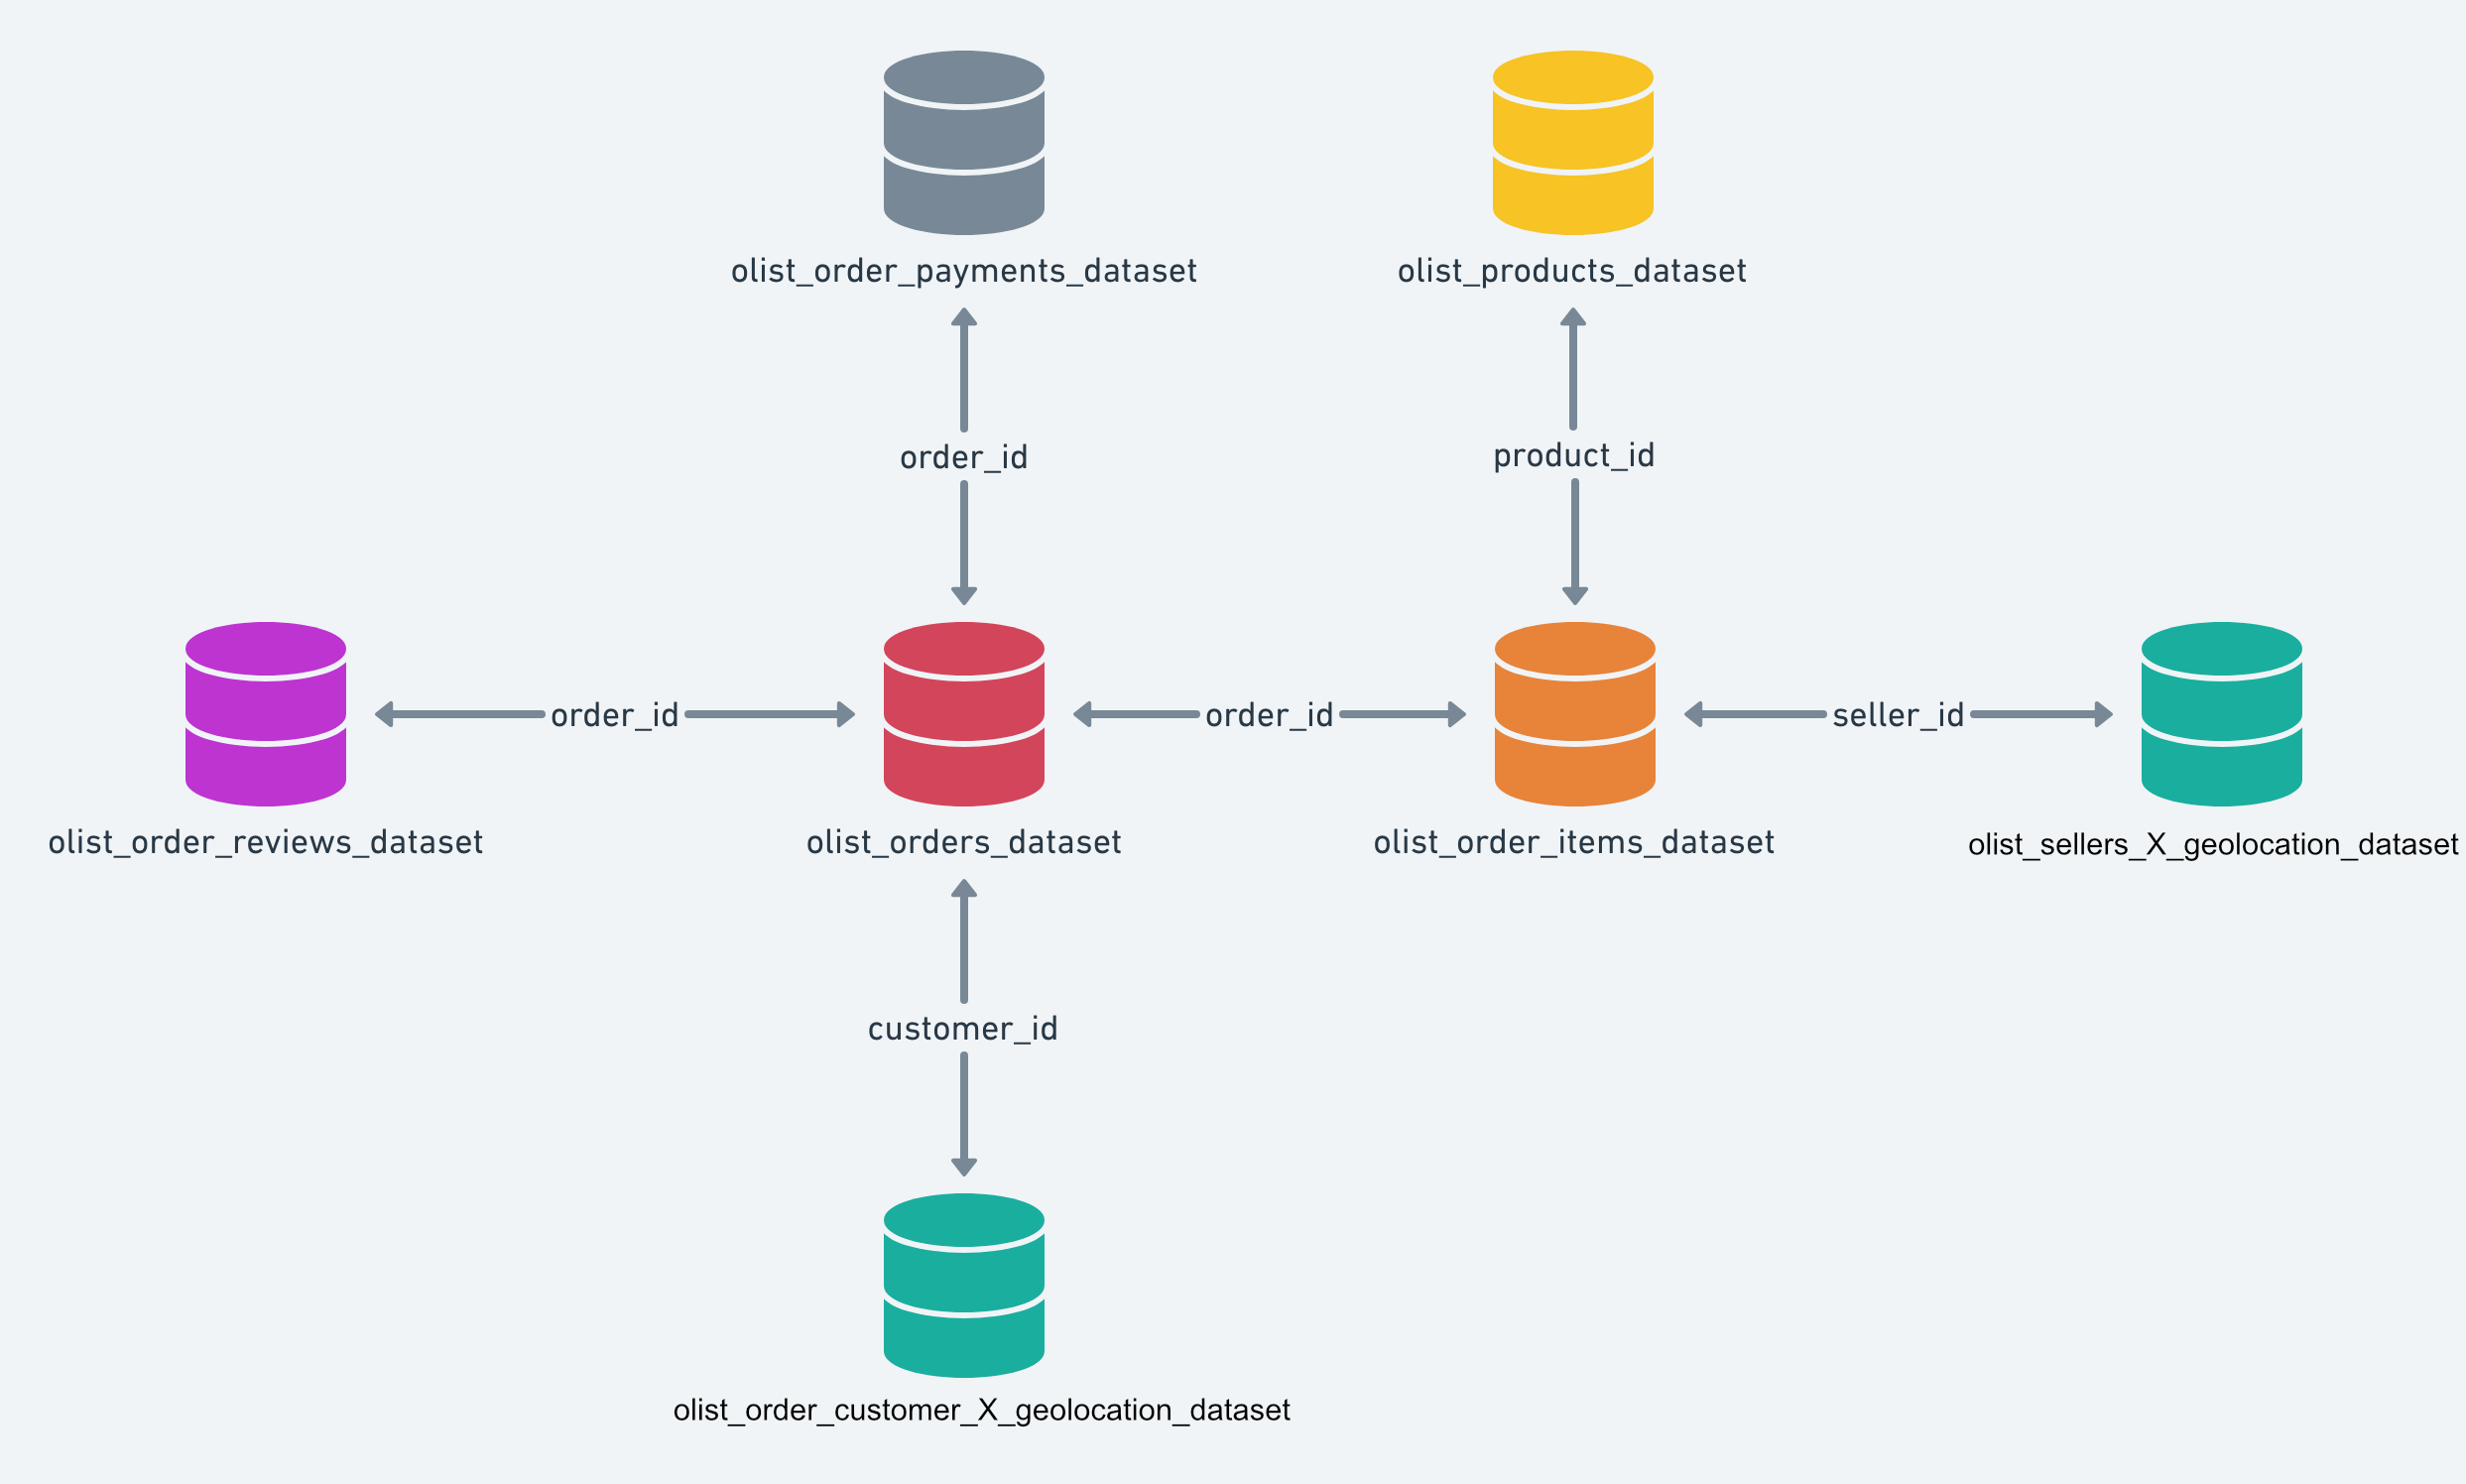

# Fichier liaison (suite - 2)

    
1) olist_order_items_dataset
- left :
    - olist_products_dataset (product_id)
    - olist_sellers_dataset (seller_id)
    
2) olist_orders_dataset
- left :
    - olist_order_reviews_dataset (order_id)
    - olist_order_payments_dataset (order_id)
    - olist_order_items_dataset (order_id)
    - olist_order_customer_dataset (customer_id)

In [32]:
seller_X_order_items_df = pd.merge(left=order_items_df,right=seller_geo_df,on="seller_id",how="left")

In [33]:
final_order_item_df = pd.merge(left=seller_X_order_items_df,right=product_df,on="product_id",how="left")
funct_g.presentation_df(final_order_item_df)

Dimensionnalitées : (112650, 20)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277.0,-22.496953,-44.127492,volta redonda,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471.0,-23.565096,-46.518565,são paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564.0,-22.262584,-46.171124,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403.0,-20.553624,-47.387359,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900.0,-22.929384,-53.135873,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [34]:
final_order_item_df.to_feather(dir_final_dataset + "olist_product_seller")
final_order_item_df.to_csv(dir_final_dataset + "olist_product_seller.csv")

In [35]:
del seller_geo_df,seller_X_order_items_df,product_df,order_items_df

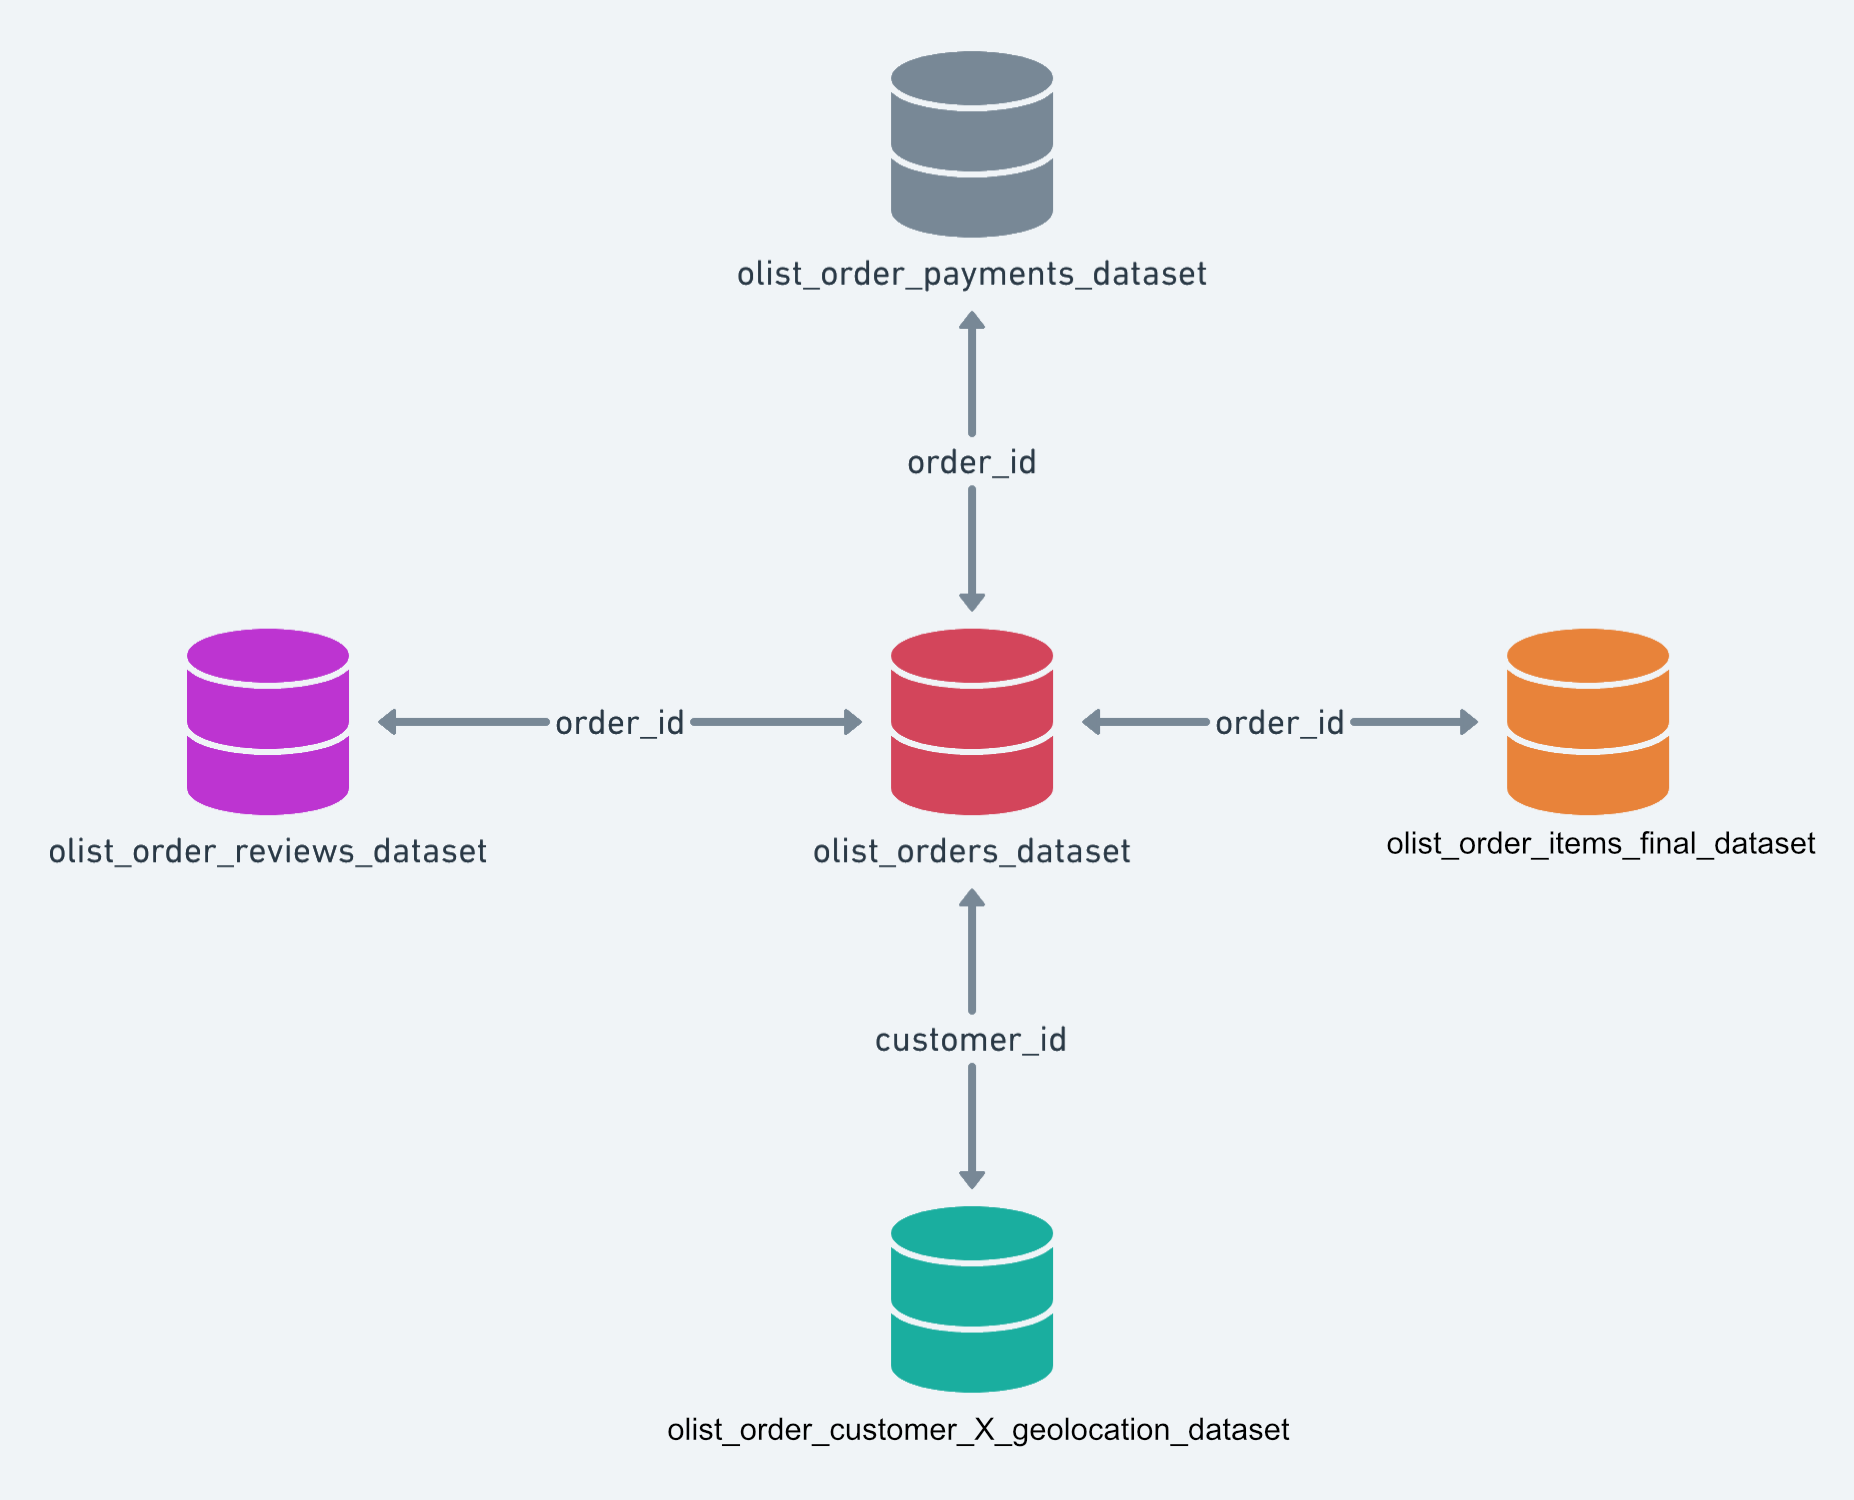

# Fichier liaison (suite - 3)

1) olist_orders_dataset
- left :
    - olist_order_reviews_dataset (order_id)
    - olist_order_payments_dataset (order_id)
    - olist_order_items_dataset (order_id)
    - olist_order_customer_dataset (customer_id)
    
2) optionnel :
- product_category_name_translation (product_category_name) <=> olist_order_items_dataset (product_category_name)
    
le noms des dataframe sont :
- `final_order_item_df` => olist_order_items_final_dataset (liaison => **many to one /!\ réduire si nécessaire**)
- `order_df` => olist_orders_dataset (liaison => fichier source...)
- `customer_geo_df` => olist_order_customer_X_geolocation_dataset (liaison => one to one)
- `order_reviews_df` => olist_order_reviews_dataset (liaison => **many to one /!\ réduire**)
- `order_payments_df` => olist_order_payments_dataset (liaison => **many to one /!\ réduire**)


fonction des dataframes : 
- `final_order_item_df` => liste des produits et vendeurs associés avec leur géolocalisation 
- `order_df` => liste de toutes les commandes passées
- `customer_geo_df` => données sur le client et sa géolocalisation
- `order_reviews_df` => commentaire des clients pour une commande
- `order_payments_df` => liste des moyens de paiement pour une commande 


On doit d'abord traiter les jeu de données `order_payments_df` pour avoir une ligne associée à une commande et `order_reviews_df` pour n'avoir que une réponse pour une commande

### final_order_item_df

In [36]:
funct_g.presentation_df(final_order_item_df)

Dimensionnalitées : (112650, 20)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277.0,-22.496953,-44.127492,volta redonda,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471.0,-23.565096,-46.518565,são paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564.0,-22.262584,-46.171124,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403.0,-20.553624,-47.387359,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900.0,-22.929384,-53.135873,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [37]:
final_order_item_df.groupby("order_id")["product_id"].nunique().sort_values().tail(5)

order_id
3990f96693d321ac142fff312bf3706a    6
ad850e69fce9a512ada84086651a2e7d    7
77df84f9195be22a4e9cb72ca9e8b4c2    7
7d8f5bfd5aff648220374a2df62e84d5    7
ca3625898fbd48669d50701aba51cd5f    8
Name: product_id, dtype: int64

In [38]:
final_order_item_df[final_order_item_df["order_id"] == "ca3625898fbd48669d50701aba51cd5f"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
89007,ca3625898fbd48669d50701aba51cd5f,1,1065e0ebef073787a7bf691924c60eeb,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,309.0,1.84,84530.0,-25.371976,-50.462084,teixeira soares,PR,construcao_ferramentas_construcao,59.0,339.0,1.0,4300.0,29.0,7.0,29.0
89008,ca3625898fbd48669d50701aba51cd5f,2,0cf2faf9749f53924cea652a09d8e327,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,33.9,1.84,84530.0,-25.371976,-50.462084,teixeira soares,PR,construcao_ferramentas_construcao,59.0,338.0,1.0,1200.0,20.0,8.0,20.0
89009,ca3625898fbd48669d50701aba51cd5f,3,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67,84530.0,-25.371976,-50.462084,teixeira soares,PR,construcao_ferramentas_construcao,58.0,339.0,1.0,4100.0,26.0,8.0,26.0
89010,ca3625898fbd48669d50701aba51cd5f,4,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67,84530.0,-25.371976,-50.462084,teixeira soares,PR,construcao_ferramentas_construcao,58.0,339.0,1.0,4100.0,26.0,8.0,26.0
89011,ca3625898fbd48669d50701aba51cd5f,5,5dae498eff2d80057f56122235a36aff,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15,88750.0,-28.274305,-49.165212,braco do norte,SC,construcao_ferramentas_construcao,58.0,338.0,1.0,2700.0,24.0,7.0,24.0
89012,ca3625898fbd48669d50701aba51cd5f,6,4a5c3967bfd3629fe07ef4d0cc8c3818,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,109.9,0.15,84530.0,-25.371976,-50.462084,teixeira soares,PR,construcao_ferramentas_construcao,55.0,338.0,1.0,2750.0,25.0,8.0,25.0
89013,ca3625898fbd48669d50701aba51cd5f,7,678c229b41c0e497d35a25a8be1cc631,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15,88750.0,-28.274305,-49.165212,braco do norte,SC,construcao_ferramentas_construcao,60.0,339.0,1.0,3100.0,24.0,7.0,24.0
89014,ca3625898fbd48669d50701aba51cd5f,8,21b524c4c060169fa75ccf08c7da4627,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,63.7,0.15,84530.0,-25.371976,-50.462084,teixeira soares,PR,construcao_ferramentas_construcao,60.0,338.0,1.0,3350.0,21.0,8.0,21.0
89015,ca3625898fbd48669d50701aba51cd5f,9,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68,84530.0,-25.371976,-50.462084,teixeira soares,PR,construcao_ferramentas_construcao,57.0,338.0,1.0,2150.0,20.0,8.0,20.0
89016,ca3625898fbd48669d50701aba51cd5f,10,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68,84530.0,-25.371976,-50.462084,teixeira soares,PR,construcao_ferramentas_construcao,57.0,338.0,1.0,2150.0,20.0,8.0,20.0


`freight_value` est la somme des frais de transport répartit sur l'ensemble des articles. On peut donc juste faire un `.sum()` pour cette valeur, pour le reste, chaque colonne est associée à un article unique `product_id`

In [39]:
final_order_item_df["order_item_id"].max()

21

In [40]:
final_order_item_df.groupby("order_id")["product_id"].nunique().max()

8

## order_payments_df

In [42]:
order_payments_df["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

Mettre tout sur une ligne avec la somme de chaque type payment genre `payment_value_credit_card` => somme / `payment_value_voucher` => somme etc...

In [43]:
order_payments_df[order_payments_df["payment_type"]== "not_defined"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


Cette colonne sera sûrement à supprimer, dans cette partie on ne traite pas les données encore...

In [44]:
order_payments_df.groupby("order_id")["payment_installments"].nunique().sort_values().tail(1)

order_id
1d3b8d78074e0b50f10346941e67e9de    3
Name: payment_installments, dtype: int64

In [45]:
order_payments_df[order_payments_df["order_id"]=="1d3b8d78074e0b50f10346941e67e9de"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
22174,1d3b8d78074e0b50f10346941e67e9de,2,credit_card,8,80.09
67624,1d3b8d78074e0b50f10346941e67e9de,3,voucher,1,26.07
92385,1d3b8d78074e0b50f10346941e67e9de,1,credit_card,4,45.14


<AxesSubplot:>

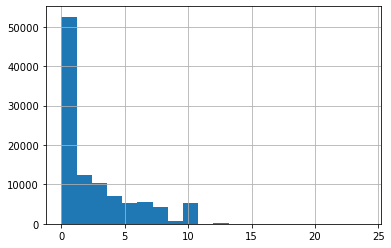

In [46]:
order_payments_df["payment_installments"].hist(bins=20)

Pour le `payment_value` on fait la somme par type de paiement, pour le `payment_sequential` on prend la valeur max qui correspond en combien de fois le paiement a été effectué (avec des moyens de paiement différent), et `payment_installments` on fait la somme des valeurs par type de paiement et on crée une colonne par type de paiement pour `payment_installment_XXX`

In [47]:
funct_g.presentation_df(order_df)

Dimensionnalitées : (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [48]:
def transform_payment_order_df(df):
    df_ = df.copy()
    # on récupere tous les types de paiement
    types = order_payments_df["payment_type"].unique().tolist()
    
    # grouper par commande et type de paiement
    group = df_.groupby(["order_id","payment_type"])
    all_value = pd.DataFrame(group.agg(["sum","count"])).reset_index()
    # pour facilité le merge et ne pas spécifier la colonne
    all_value.index = all_value["order_id"]
    
    # on créer le df avec toutes les valeurs uniques de commande
    new_df = pd.DataFrame(np.array(all_value["order_id"].unique().tolist()),columns=["order_id"])
    for typ in types:
        # payment_value de chaque type de paiement
        new_df = pd.merge(left=new_df, 
                         right=pd.DataFrame(all_value[all_value["payment_type"] == typ]["payment_value","sum"]).
                         droplevel(1,axis=1).reset_index().rename({"payment_value":"payment_value_" + typ},axis=1)
                         ,how="left")
        # payment_installments de chaque type de paiement
        new_df = pd.merge(left=new_df, 
                         right=pd.DataFrame(all_value[all_value["payment_type"] == typ]["payment_installments","sum"]).
                         droplevel(1,axis=1).reset_index().rename({"payment_installments":"payment_installments_" + typ},axis=1)
                         ,how="left")
        # payment_sequential de chaque type de paiement
        new_df = pd.merge(left=new_df, 
                         right=pd.DataFrame(all_value[all_value["payment_type"] == typ]["payment_sequential","count"]).
                         droplevel(1,axis=1).reset_index().rename({"payment_sequential":"payment_sequential_" + typ},axis=1)
                         ,how="left")

    new_df["total_payment_value"] = df_.groupby("order_id")["payment_value"].sum().values
    new_df["nb_payment_type"] = df_.groupby("order_id")["payment_type"].nunique().values
    return new_df

In [49]:
order_payments_df_V2 = transform_payment_order_df(order_payments_df)
funct_g.presentation_df(order_payments_df_V2)

Dimensionnalitées : (99440, 18)


,order_id,payment_value_credit_card,payment_installments_credit_card,payment_sequential_credit_card,payment_value_boleto,payment_installments_boleto,payment_sequential_boleto,payment_value_voucher,payment_installments_voucher,payment_sequential_voucher,payment_value_debit_card,payment_installments_debit_card,payment_sequential_debit_card,payment_value_not_defined,payment_installments_not_defined,payment_sequential_not_defined,total_payment_value,nb_payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.19,1
1,00018f77f2f0320c557190d7a144bdd3,259.83,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.83,1
2,000229ec398224ef6ca0657da4fc703e,216.87,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.87,1
3,00024acbcdf0a6daa1e931b038114c75,25.78,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.78,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.04,1


In [50]:
order_payments_df_V2.to_feather(dir_final_dataset + "olist_order_payments")
order_payments_df_V2.to_csv(dir_final_dataset + "olist_order_payments.csv")

## order_reviews_df

In [51]:
order_reviews_df.groupby("order_id")["review_id"].nunique().sort_values().tail(5)

order_id
241ed1aad96c4cc788ee6f8ab96242ef    2
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
8e17072ec97ce29f0e1f111e598b0c85    3
c88b1d1b157a9999ce368f218a407141    3
Name: review_id, dtype: int64

On voit que sur une commande le client a répondu plusieurs fois au questionnaire de satisfaction... il ne faut donc prendre que la dernière réponse au questionnaire (selon la date de réponse*)

 > **/!\ On peut rajouter une colonne sur le nombre d'échange (nombre de review) et la fréquence des échanges voir l'évolution de la note pour le SAV et la vitesse de réponse de l'utilisateur /!\**

In [52]:
order_reviews_df[order_reviews_df["order_id"]=="241ed1aad96c4cc788ee6f8ab96242ef"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
48222,d70b9aa33dad62363fdda2d758373314,241ed1aad96c4cc788ee6f8ab96242ef,5,NaN,NaN,2018-01-25 00:00:00,2018-01-25 22:00:19
94319,3052a79d76a1932ff98c990a59230f8d,241ed1aad96c4cc788ee6f8ab96242ef,5,NaN,NaN,2018-01-23 00:00:00,2018-01-24 00:17:19


In [53]:
# pour grouper par commander mais prendre la date la plus élevée
order_reviews_df["review_answer_timestamp"] = pd.to_datetime(order_reviews_df["review_answer_timestamp"])

order_reviews_df["review_creation_date"] = pd.to_datetime(order_reviews_df["review_creation_date"])

order_reviews_df["time_to_answer"] = (order_reviews_df["review_answer_timestamp"] - \
                                    order_reviews_df["review_creation_date"])

order_review_df_v2 = order_reviews_df.loc[order_reviews_df.groupby("order_id")["review_answer_timestamp"].idxmin()]
# Nombre d'échange sur la commande
order_review_df_v2["nb_reviews"] = order_reviews_df.groupby("order_id")["review_id"].nunique().values

# évolution de la note : 0 stable / positif bon SAV évolution du score 
# entre la première réponse et la dernière / négatif mauvais SAV
order_review_df_v2["score_evolution"] = (order_reviews_df.loc[order_reviews_df.groupby("order_id")["review_answer_timestamp"].idxmax()]["review_score"].values - \
order_reviews_df.loc[order_reviews_df.groupby("order_id")["review_answer_timestamp"].idxmin()]["review_score"].values)

# vitesse moyenne de réponse au questionnaire
order_review_df_v2["time_to_answer"] = order_reviews_df.groupby("order_id")["time_to_answer"].agg(np.mean).values

In [54]:
order_review_df_v2[order_review_df_v2["order_id"]=="241ed1aad96c4cc788ee6f8ab96242ef"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,time_to_answer,nb_reviews,score_evolution
94319,3052a79d76a1932ff98c990a59230f8d,241ed1aad96c4cc788ee6f8ab96242ef,5,NaN,NaN,2018-01-23,2018-01-24 00:17:19,0 days 23:08:49,2,0


# Création du dataset final 

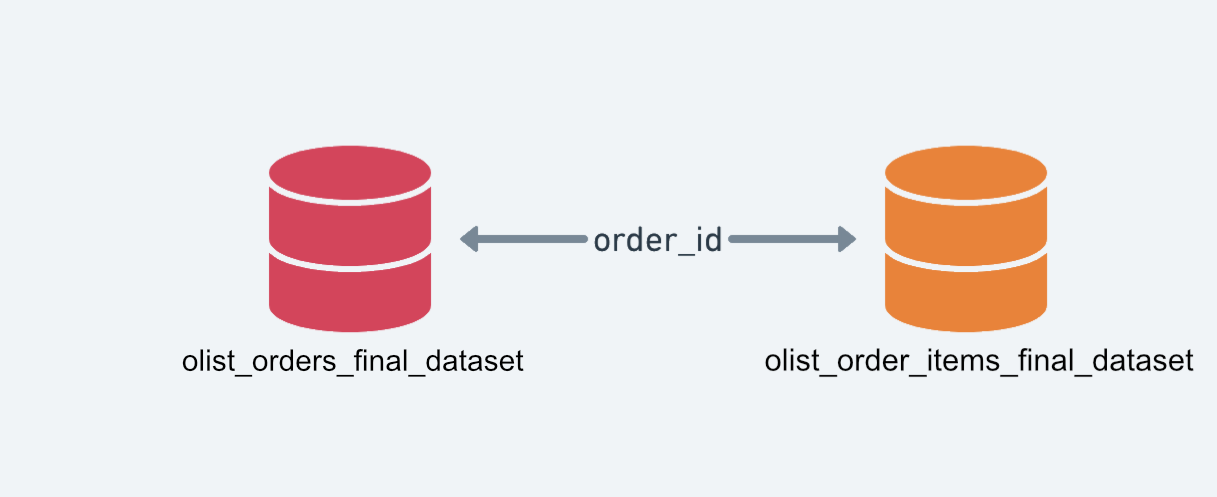

In [55]:
final_dataset = order_df.merge(final_order_item_df,how="inner")
final_dataset = final_dataset.merge(order_review_df_v2,how="inner")
final_dataset = final_dataset.merge(order_payments_df_V2,how="inner") 
final_dataset = pd.merge(left=final_dataset,right=customer_geo_df,
                         left_on="customer_id",right_on="customer_id",
                         how="left",suffixes=("_seller","_customer"))
funct_g.presentation_df(final_dataset)

Dimensionnalitées : (112647, 59)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,time_to_answer,nb_reviews,score_evolution,payment_value_credit_card,payment_installments_credit_card,payment_sequential_credit_card,payment_value_boleto,payment_installments_boleto,payment_sequential_boleto,payment_value_voucher,payment_installments_voucher,payment_sequential_voucher,payment_value_debit_card,payment_installments_debit_card,payment_sequential_debit_card,payment_value_not_defined,payment_installments_not_defined,payment_sequential_not_defined,total_payment_value,nb_payment_type,customer_unique_id,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,-23.680729,-46.444238,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1 days 03:43:48,1,0,18.12,1.0,1.0,NaN,NaN,NaN,20.59,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,38.71,2,7c396fd4830fd04220f754e42b4e5bff,3149.0,-23.576983,-46.587161,são paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,-19.807681,-43.980427,belo horizonte,MG,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,0 days 18:37:50,1,0,NaN,NaN,NaN,141.46,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.46,1,af07308b275d755c9edb36a90c618231,47813.0,-12.177924,-44.660711,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,-21.363502,-48.229601,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,4 days 19:07:58,1,0,179.12,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.12,1,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,-16.745150,-48.514783,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842.0,-19.837682,-43.924053,belo horizonte,MG,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,2 days 19:21:58,1,0,72.20,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.20,1,7c142cf63193a1473d2e66489a9ae977,59296.0,-5.774190,-35.271143,são gonçalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:

In [56]:
final_dataset.to_feather(dir_final_dataset + "olist_all_file")
final_dataset.to_csv(dir_final_dataset + "olist_all_file.csv")

## Jeu de données sans les articles

In [57]:
final_dataset_without_product = order_df.merge(order_review_df_v2,how="inner")
final_dataset_without_product = final_dataset_without_product.merge(order_payments_df_V2,how="inner") 
final_dataset_without_product = pd.merge(left=final_dataset_without_product,right=customer_geo_df,
                         left_on="customer_id",right_on="customer_id",
                         how="left",suffixes=("_seller","_customer"))
funct_g.presentation_df(final_dataset_without_product)

Dimensionnalitées : (99440, 40)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,time_to_answer,nb_reviews,score_evolution,payment_value_credit_card,payment_installments_credit_card,payment_sequential_credit_card,payment_value_boleto,payment_installments_boleto,payment_sequential_boleto,payment_value_voucher,payment_installments_voucher,payment_sequential_voucher,payment_value_debit_card,payment_installments_debit_card,payment_sequential_debit_card,payment_value_not_defined,payment_installments_not_defined,payment_sequential_not_defined,total_payment_value,nb_payment_type,customer_unique_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1 days 03:43:48,1,0,18.12,1.0,1.0,NaN,NaN,NaN,20.59,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,38.71,2,7c396fd4830fd04220f754e42b4e5bff,3149.0,-23.576983,-46.587161,são paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,0 days 18:37:50,1,0,NaN,NaN,NaN,141.46,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.46,1,af07308b275d755c9edb36a90c618231,47813.0,-12.177924,-44.660711,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,4 days 19:07:58,1,0,179.12,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.12,1,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,-16.745150,-48.514783,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,2 days 19:21:58,1,0,72.20,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.20,1,7c142cf63193a1473d2e66489a9ae977,59296.0,-5.774190,-35.271143,são gonçalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51,1 days 13:02:51,1,0,28.62,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.62,1,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,-23.676370,-46.514627,santo andre,SP


In [58]:
final_dataset_without_product.to_feather(dir_final_dataset + "olist_all_file_without_items")
final_dataset_without_product.to_csv(dir_final_dataset + "olist_all_file_without_items.csv")